This code will be used to generate a sampling of n pentagons from the moduli space of pentagons with side lengths 0\neq (d_1,d_2,d_3,d_4,d_5)\in R^5. Without loss of generality we can assume that d_1=1 because the moduli space for (d_1,d_2,d_3,d_4,d_5) is the same as the moduli space for (d_1/d_1=1,d_2/d_1,d_3/d_1,d_4/d_1,d_5/d_1). In essence, for any pentagon with no side lengths equal to 1, we can scale all of the side lengths so that one side length is equal to 1 and the pentagons are geometrically the same.

In [44]:
import numpy as np
import math

class InternalException(Exception):
    "Internal Function Error"

def len_side(a, b, C):#law of cosines for sides a,b and angle C
    if C>math.pi:
        C = 2*math.pi-C
    c_sq = a ** 2 + b ** 2 - 2 * a * b * math.cos(C)
    c = math.sqrt(c_sq)
    return c

def angle_from_side(a, b, c):#law of cosines for sides a,b,c returning angle C
    
    cos_c = (a **2 + b ** 2 - c ** 2)/(2*a*b)
    C = math.acos(cos_c)
    return C

def get_intersections(x0, y0, r0, x1, y1, r1):#find intersection points of two circles
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    #change the following nones to be more descriptive
    
    # non intersecting
    if d > r0 + r1 :
        return 'non intersecting'
    # One circle within other
    if d < abs(r0-r1):
        return 'inscribed'
    # coincident circles
    if d == 0 and r0 == r1:
        return 'same circle'
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h=math.sqrt(r0**2-a**2)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=x2+h*(y1-y0)/d     
        y3=y2-h*(x1-x0)/d 

        x4=x2-h*(y1-y0)/d
        y4=y2+h*(x1-x0)/d
        
        return [[x3, y3], [x4, y4]]
    
def max_sum_angle_ad(dist, start_ang): #Take in the distances of our pentagon and calculate max alpha+beta for adjacent angles
    if start_ang >= (math.pi)/2:
        raise InternalException("Input new angle")
    else:
        c = dist[1] + dist[2]
        b = len_side(c, dist[0], start_ang)
        beta = angle_from_side(b, dist[0], c)
        alpha = angle_from_side(1, dist[3], b) #weirdness when we consider 1, 1, b?
        gamma = angle_from_side(1, b, dist[3])
        
        return alpha + beta + gamma

def max_sum_angle_op(dist, start_ang): #Take in the distances of our pentagon and calculate max alpha+beta for adjacent angles
    if start_ang >= (math.pi)/2:
        raise InternalException("Input new angle")
    else:
        c = dist[1] + dist[2]
        b = len_side(dist[0], c, start_ang)
        gammabeta = angle_from_side(b,dist[0],c)
        gamma = angle_from_side(b,1,dist[3])
        alpha = angle_from_side(1,dist[3], b)
        return alpha+gammabeta-gamma
    

    
#first we define a function which takes theta1,theta2,(d_2,d_3,d_4,d_5) assuming d_1=1 and outputs a list [(a,b),...]
#of length 5 with each entry a tuple with coordinates for a vertex of the pentagon
    
def pentagon(theta1, theta2, distances, orientation='ad'):
    if sum(distances)<1:
        raise InternalException('Distances too small to make a valid pentagon.')
        
    output=[]
    w2=[1-distances[0]*np.cos(theta2),distances[0]*np.sin(theta2)]
    
    b=len_side(distances[3],1,theta1)
    if orientation == 'ad':
        thetapp=theta2-angle_from_side(b,1,distances[3])
    elif orientation == 'op':
        thetapp=theta2+angle_from_side(b,1,distances[3])
    c=len_side(b,distances[0],thetapp)#used law of cosines x3 to find c=distance between w2,w4
    
    w4=[distances[3]*np.cos(theta1),distances[3]*np.sin(theta1)]
    w3s=get_intersections(w2[0],w2[1],distances[1],w4[0],w4[1],distances[2])
    
    if c>distances[1]+distances[2]: #view dist[1] and dist[2] as the radii of circles centered at vertices
        raise InternalException('Angles and distances cannot form a valid pentagon.',c, distances[1]+distances[2])
    
    if type(w3s) is str:
        raise InternalException('Could not calculate circle intersection: ',w3s)
    
    
    if w3s[0]!=w3s[1]:#if w3s[0] does not equal w3s[1] then the circle has two intersection points and there are two valid pentagons
        p1=[[0,0],[1,0],w2]#append w0,w1,w2
        p1.append(w3s[0])#append w3
        p1.append(w4)#append w4
        output.append(p1)
        p2=[[0,0],[1,0],w2]#append w0,w1,w2
        p2.append(w3s[1])#append w3
        p2.append(w4)#append w4
        output.append(p2)
        p3=[[0,0],[1,0],[w2[0],-1*w2[1]],[w3s[0][0],-1*w3s[0][1]],[w4[0],-1*w4[1]]]#making the flipped orientation pentagon
        p4=[[0,0],[1,0],[w2[0],-1*w2[1]],[w3s[1][0],-1*w3s[1][1]],[w4[0],-1*w4[1]]]
        output.append(p3)
        output.append(p4)
    else:
        p1=[[0,0],[1,0],w2]#append w0,w1,w2
        p1.append(w3s[0])#append w3
        p1.append(w4)#append w4
        output.append(p1)
        p2=[[0,0],[1,0],[w2[0],-1*w2[1]],[w3s[0][0],-1*w3s[0][1]],[w4[0],-1*w4[1]]]
        output.append(p2)
    
    return np.array(output, dtype=object) #this returns a list 2-4 pentagons, each in numpy array form



In [27]:
p=pentagon(6,1/4,[1,1,1,1])
p.shape
max_sum_angle([1,1,1,1], (math.pi)/3)

4.1887902047863905

In [26]:
p
max_sum_angle([1,1,1,1], (-math.pi)/3)

4.1887902047863905

In [38]:
np.linalg.norm(p[1][4]-p[1][0])

1.0

[[0 0]
 [1 0]
 [0.031087578289355267 0.24740395925452294]
 [0.07859916817497431 -0.7514667274845268]
 [0.9601702866503661 -0.27941549819892586]]


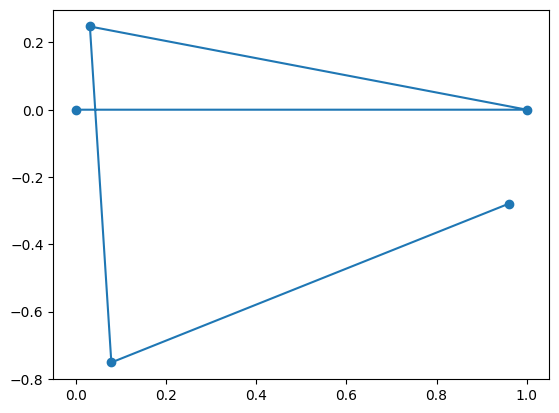

In [7]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# data=p[0]
# #plt.rcParams["figure.figsize"] = [4.0, 3.50]
# plt.scatter(data[:,0],data[:,1])
# plt.plot(data[:,0],data[:,1])
# print(data)
# plt.show()

This next function takes n,(d_2,d_3,d_4,d_5) as an argument and outputs a list of around 2n randomly generated pentagons with side lengths (d_2,d_3,d_4,d_5).

In [163]:

def degenerate_penta(n, distances):
    if sum(distances)<1:
        raise InternalException('Distances too small to make a valid pentagon.')
    
    output=[]
    #right oriented degenerate pentagons
    max_angle=angle_from_side(distances[0], distances[2]+(1-distances[3]),distances[1])
    theta2=np.linspace(0,max_angle,n)
    for i in theta2:
        w3=[1-distances[0]*np.cos(i),distances[0]*np.sin(i)]
        w4=get_intersections(distances[3],0, distances[2], w3[0], w3[1], distances[1])
        if type(w4)==str:
            continue
        w4=[x for x in w4 if x[1]==min(w4[0][1],w4[1][1])][0]#take intersection point below x axis
        p=[[0,0],[1,0],w3,w4,[distances[3],0]]
        output.append(p)
        p=[[0,0],[1,0],[w3[0],-1*w3[1]],[w4[0],-1*w4[0]],[distances[3],0]]#flipped orientation
        output.append(p)
    
    #left oriented degenerate pentagons
    max_angle=angle_from_side(distances[1]+(1-distances[0]), distances[3],distances[2])
    theta2=np.linspace(0,max_angle,n)
    for i in theta2:
        w5=[distances[3]*np.cos(i),distances[3]*np.sin(i)]
        w4=get_intersections(w5[0], w5[1], distances[2], 1-distances[0], 0, distances[1])
        if type(w4)==str:
            continue
        w4=[x for x in w4 if x[1]==min(w4[0][1],w4[1][1])][0]#take intersection point below x axis
        p=[[0,0],[1,0],[1-distances[0],0],w4,w5]
        output.append(p)
        p=[[0,0],[1,0],[1-distances[0],0],[w4[0],-1*w4[1]],[w5[0],-1*w5[1]]]#flipped orientation
        output.append(p)
    
    #center oriented degenerate pentagons
    max_angle=angle_from_side(distances[0]+(max(distances[1],distances[2])-distances[0]),distances[3],1)
    theta2=np.linspace(0,max_angle,n)
    for i in theta2:
        w1=[distances[3]-distances[3]*np.cos(i),distances[3]*np.sin(i)]
        w2=get_intersections(w1[0], w1[1], 1, distances[0], 0, distances[0])
        if type(w2)==str:
            continue
        w2=[x for x in w2 if x[1]==min(w2[0][1],w2[1][1])][0]#take intersection point below x axis
        p=[w1,w2,[distances[2],0],[0,0],[distances[3],0]]
        output.append(p)
        p=[[w1[0],w1[1]],[w2[0],w2[1]],[distances[2],0],[0,0],[distances[3],0]]#flipped orientation
        output.append(p)

    return np.array(output,dtype=object)

def moduli_space_sample(n, distances, start_ang, sampling='rd'):
    if sum(distances)<1:
        raise Exception('Distances too small to make a valid pentagon.')
    
    sample=[]
    if sampling=='even':
        theta1=np.linspace(0.0000001,max_sum_angle_ad(distances, start_ang),math.ceil(math.sqrt(n//2)))
        for i in theta1:
            theta2=np.linspace(0.0000001,max_sum_angle_ad(distances, start_ang)-i,math.ceil(math.sqrt(n//2)))
            for j in theta2:
                try:
                    padj=pentagon(float(i),float(j),distances)
                    for k in padj:
                        sample.append(k)
                    popp=pentagon(float(i),float(j),distances,orientation='op')
                    for k in popp:
                        sample.append(k)
                except InternalException as e:
                    #print(str(e))
                    #print("firstloop")
                    continue
        for i in degenerate_penta(math.ceil(n*0.001),distances):
            sample.append(i)
    elif sampling=='rd':
        for i in range(n):
            while True:
                theta1=np.random.uniform(0.0000001,max_sum_angle_ad(distances, start_ang),1)
                theta2=np.random.uniform(0.0000001,max_sum_angle_ad(distances, start_ang)-theta1,1)
                try:
                    p=pentagon(theta1,theta2,distances)
                    for j in p:
                        sample.append(j)
                    break
                except InternalException as e:
                    #print(str(e))
                    #print("firstloop")
                    continue
            while True:
                max_angle=max_sum_angle_op(distances, start_ang)
                theta1=np.random.uniform(2*math.pi-max_angle,2*math.pi,1)
                theta2=np.random.uniform(0,max_angle-(2*math.pi-theta1),1)
                try:
                    p=pentagon(theta1,theta2,distances, orientation='op')
                    for j in p:
                        sample.append(j)
                    break
                except InternalException as e:
                    #print(str(e))
                    #print("secondloop")
                    continue
        for i in degenerate_penta(math.ceil(n*0.001),distances):
            sample.append(i)
    else:
        raise InternalException('Sampling input not an option. Choose rd or even.')
        
    return sample

# r=moduli_space_sample(1,[1,1,1,1], (math.pi/3))
# len(r)
# r

[[[0 0]
  [1 0]
  [0.0 0.0]
  [0.35 -0.9367496997597597]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.0 -0.0]
  [0.35 -0.35]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.004596072359918324 0.09576544699785518]
  [0.22455270151709433 -0.8797442050762863]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.004596072359918324 -0.09576544699785518]
  [0.22455270151709433 -0.22455270151709433]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.018342041677398058 0.19065060414774623]
  [0.10725330516890824 -0.8053889468864198]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.018342041677398058 -0.19065060414774623]
  [0.10725330516890824 -0.10725330516890824]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.041111553013158386 0.28378327335338693]
  [0.0013097682228113694 -0.7154243216575312]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.041111553013158386 -0.28378327335338693]
  [0.0013097682228113694 -0.0013097682228113694]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.07269530572380123 0.3743073656412943]
  [-0.09065603430864383 -0.6122605943643024]
  [0.7 0]]

 [[0 0]
  [1 0]
  [0.07269530572380123 -0.374

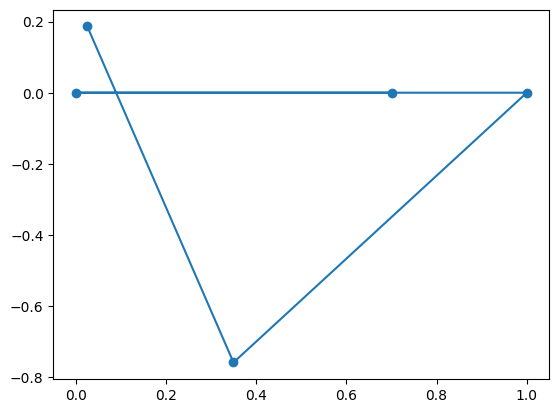

In [159]:
#r=moduli_space_sample(3,[1,1,1,1], (math.pi/5),sampling='even')
r=degenerate_penta(10,[1,1,1,0.7])
len(r)
print(r)

import matplotlib.pyplot as plt
%matplotlib inline
data=r[45]
print(data)
#plt.rcParams["figure.figsize"] = [4.0, 3.50]
plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1])
plt.show()

In [156]:
np.linalg.norm(r[49][4]-r[49][3])

0.7

In [175]:
r=moduli_space_sample(8150,[0.6,0.6,0.6,1], (math.pi/4))
len(r)

65254

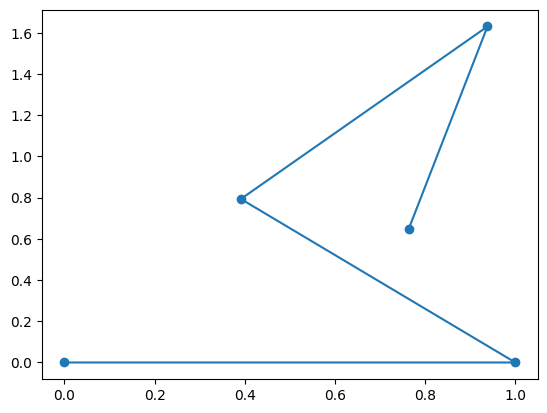

In [40]:
data=r[9]
#plt.rcParams["figure.figsize"] = [4.0, 3.50]
plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1])
plt.show()

In [176]:
from xlwt import Workbook
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1')

def clean(i):
    return (str(np.array(i[0]).tolist())+', '+str(np.array(i[1]).tolist())).replace('[','').replace(']','')

for count1, pent in enumerate(r):
    for count2, i in enumerate(pent):
        sheet1.write(count1, count2, clean(i))

wb.save('genus 3 degen.xls')